# Data Science Blog post

Au programme :
- étude sur plusieurs années
- Quel sont les langages les plus populaire chaque année.
- Quels autres changement peuvent être observés chaque année.



charger les données depuis 2017 

on aura donc 2017'2018,2019,2020,2021,2022,2023,2024

Donc 8 années à analyser sur un format standardisé.

Ce qui permet d'analyser des tendances récentes.

- On s'intéressera à la place de l'IA et de stackOverflow dans les entreprises (2questions)
- Des langages les plus utilisé au cours du temps (1 question)
- De l'évolution des profils utilisant StackOverflow (1 à 2 questions)

On a donc 4 à 5 questions.

In [1]:
#import

import os
import zipfile
import pandas as pd

In [2]:

# Chemin vers le répertoire principal contenant les dossiers
chemin_principal = 'Stack-overflow-developper-survey'

df_list =[]

# Parcourir tous les dossiers dans le répertoire principal
for dossier in os.listdir(chemin_principal):
    # Vérifier si le nom du dossier contient une année entre 2017 et 2024
    try:
        annee = int(dossier[-4:])  # Assumer que l'année est les 4 derniers caractères
        if 2017 <= annee <= 2024:
            chemin_dossier = os.path.join(chemin_principal, dossier)
            # Assumer que 'survey_results_public.csv' est dans chaque dossier
            chemin_fichier = os.path.join(chemin_dossier, 'survey_results_public.csv')
            chemin_fichier_schema = os.path.join(chemin_dossier, 'survey_results_schema.csv')
            
            # Lire le CSV dans un DataFrame
            df = pd.read_csv(chemin_fichier)
            df_2 = pd.read_csv(chemin_fichier_schema)
            df_list.append(df)
            
            # Nom du DataFrame composé du nom du dossier et de l'année
            nom_dataframe = f'survey_results_public_{annee}'
            nom_dataframe_schema = f'survey_results_schema_{annee}'
            
            # Ajouter la colonne 'Year'
            df['Year'] = annee

            
            # Assigner le DataFrame à une variable avec le nom dynamique
            globals()[nom_dataframe] = df
            globals()[nom_dataframe_schema] = df_2
            
            print(f'DataFrame créé pour {dossier} avec le nom {nom_dataframe}')
            print(f'DataFrame créé pour {dossier} avec le nom {nom_dataframe_schema}')
    except ValueError:
        # Si le nom du dossier ne se termine pas par une année valide, on passe à l'itération suivante
        continue

print("Importation et traitement des fichiers CSV terminés.")

# Fusionner verticalement les dataframes
result = pd.concat(df_list, ignore_index=True)

DataFrame créé pour stack-overflow-developer-survey-2017 avec le nom survey_results_public_2017
DataFrame créé pour stack-overflow-developer-survey-2017 avec le nom survey_results_schema_2017


C:\Users\Marc\AppData\Local\Temp\ipykernel_17772\669414411.py:18: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_fichier)


DataFrame créé pour stack-overflow-developer-survey-2018 avec le nom survey_results_public_2018
DataFrame créé pour stack-overflow-developer-survey-2018 avec le nom survey_results_schema_2018
DataFrame créé pour stack-overflow-developer-survey-2019 avec le nom survey_results_public_2019
DataFrame créé pour stack-overflow-developer-survey-2019 avec le nom survey_results_schema_2019
DataFrame créé pour stack-overflow-developer-survey-2020 avec le nom survey_results_public_2020
DataFrame créé pour stack-overflow-developer-survey-2020 avec le nom survey_results_schema_2020
DataFrame créé pour stack-overflow-developer-survey-2021 avec le nom survey_results_public_2021
DataFrame créé pour stack-overflow-developer-survey-2021 avec le nom survey_results_schema_2021
DataFrame créé pour stack-overflow-developer-survey-2022 avec le nom survey_results_public_2022
DataFrame créé pour stack-overflow-developer-survey-2022 avec le nom survey_results_schema_2022
DataFrame créé pour stack-overflow-devel

In [3]:
# Fonction pour lister les noms des DataFrames dans la session actuelle
def list_dataframe_names():
    return [name for name, value in globals().items() if isinstance(value, pd.DataFrame)]

# Affichage des noms des DataFrames trouvés
dataframes_in_session = list_dataframe_names()
if dataframes_in_session:
    print("Noms des DataFrames actuellement chargés dans la session :")
    for name in dataframes_in_session:
        print(f"- {name}")
else:
    print("Aucun DataFrame n'est chargé dans la session actuelle.")

Noms des DataFrames actuellement chargés dans la session :
- df
- df_2
- survey_results_public_2017
- survey_results_schema_2017
- survey_results_public_2018
- survey_results_schema_2018
- survey_results_public_2019
- survey_results_schema_2019
- survey_results_public_2020
- survey_results_schema_2020
- survey_results_public_2021
- survey_results_schema_2021
- survey_results_public_2022
- survey_results_schema_2022
- survey_results_public_2023
- survey_results_schema_2023
- survey_results_public_2024
- survey_results_schema_2024
- result


In [4]:
# Désactiver la troncature pour les colonnes et lignes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
pd.set_option('display.max_rows', None)     # Afficher toutes les lignes
pd.set_option('display.width', None)        # Ajuster la largeur automatiquement
pd.set_option('display.max_colwidth', None)

In [5]:
#result['Language'].head(3)

In [6]:
#survey_results_schema_2024

In [7]:
#print("Unique values in Language:", survey_results_public_2024['LanguageHaveWorkedWith'].unique())

## 2. Data Understanding (Gather and Assess)

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Set visualization style
plt.style.use('seaborn')

# Display basic info about the DataFrame
print("DataFrame Info:")
result.info()

# Check unique years and sample columns to verify schema consistency
print("\nUnique Years:", result['Year'].unique())
print("\nSample of Columns:", result.columns.tolist()[:10])  # Show first 10 columns

# Check for missing values in key columns
key_columns = ['Year', 'AISelect', 'YearsCodePro', 'Employment', 'LearnCode', 'SOVisitFreq', 'YearsCode']
print("\nMissing Values in Key Columns:")
print(result[key_columns].isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614919 entries, 0 to 614918
Columns: 474 entries, Respondent to JobSatPoints_11
dtypes: float64(63), int64(1), object(410)
memory usage: 2.2+ GB

Unique Years: [2017 2018 2019 2020 2021 2022 2023 2024]

Sample of Columns: ['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize']

Missing Values in Key Columns:
Year                 0
AISelect        466039
YearsCodePro    263444
Employment       60196
LearnCode       312225
SOVisitFreq     169636
YearsCode       169021
dtype: int64


C:\Users\Marc\AppData\Local\Temp\ipykernel_17772\1925593317.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 3. Data Preparation (Clean)

We’ll clean the data by handling missing values and preparing categorical variables for analysis. Since machine learning is optional, we’ll focus on descriptive statistics but ensure data is ready for potential modeling.



In [9]:
def clean_categorical_column(df, column, fill_value='Unknown'):
    """
    Clean a categorical column by filling missing values and converting to category type.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - column (str): Column name to clean
    - fill_value (str): Value to fill missing entries
    
    Returns:
    - pd.Series: Cleaned column
    """
    return df[column].fillna(fill_value).astype('category')

def clean_numeric_column(df, column, strategy='median'):
    """
    Clean a numeric column by filling missing values with median or mean.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - column (str): Column name to clean
    - strategy (str): 'median' or 'mean' for imputation
    
    Returns:
    - pd.Series: Cleaned column
    """
    if strategy == 'median':
        fill_value = df[column].median()
    else:
        fill_value = df[column].mean()
    return df[column].fillna(fill_value)

# Define mapping for special values
years_code_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Preprocess YearsCode and YearsCodePro
for col in ['YearsCode', 'YearsCodePro']:
    result[col] = result[col].replace(years_code_mapping)
    result[col] = pd.to_numeric(result[col], errors='coerce')


# Clean key columns
result['AISelect'] = clean_categorical_column(result, 'AISelect')  # Do you use AI tools?
result['LearnCode'] = clean_categorical_column(result, 'LearnCode')  # How do you learn to code?
result['SOVisitFreq'] = clean_categorical_column(result, 'SOVisitFreq')  # Stack Overflow visit frequency
result['Employment'] = clean_categorical_column(result, 'Employment')  # Employment status
result['YearsCode'] = clean_numeric_column(result, 'YearsCode', 'median')  # Total coding years
result['YearsCodePro'] = clean_numeric_column(result, 'YearsCodePro', 'median')  # Professional coding years

# Rationale:
# - Categorical: Filled with 'Unknown' to preserve data for analysis without assuming values.
# - Numeric: Used median to impute missing years, as it’s robust to outliers in experience data.


# Notes:
# - Missing values in categorical columns are filled with 'Unknown' to avoid bias in frequency counts.
# - Numeric columns use median imputation to maintain central tendency, suitable for skewed distributions like years of experience.

## 4. Data Analysis and Visualization

### List of Questions to explore:

### Question 1: How have the most common learning methods for coding changed over time?

#### How have the most common learning methods for coding changed over time?
- timeline: 2017-2024
- Need to harmonize data before 2021
- line chart with top 5 learning method
- X = year, Y = Proportion(? need to be better defined), color line = learning method
- Insight: This highlights shifts in educational preferences, valuable for educators and training providers.

In [10]:
result_recent = result[result['Year'] >= 2021][['LearnCode', 'Year']].copy()

In [11]:
# Checking data content for each year

for year in [2021,2022,2023,2024]:
    result_year = result_recent[result_recent['Year'] == year].copy()
    LearnCode_Count = result_year['LearnCode'].value_counts()
    print(year)
    print('---------------------')
    for learncode, count in LearnCode_Count.items():
        print(f"{learncode}: {count}")


2021
---------------------
School: 7242
Other online resources (ex: videos, blogs, etc): 3502
Books / Physical media: 3357
School;Books / Physical media: 3136
Other online resources (ex: videos, blogs, etc);School;Books / Physical media: 2441
Other online resources (ex: videos, blogs, etc);School: 2292
Other online resources (ex: videos, blogs, etc);School;Online Courses or Certification;Books / Physical media: 2238
Other online resources (ex: videos, blogs, etc);School;Online Forum;Online Courses or Certification;Books / Physical media: 1829
Other online resources (ex: videos, blogs, etc);Books / Physical media: 1772
Other (please specify):: 1699
Other online resources (ex: videos, blogs, etc);Online Courses or Certification: 1640
Other online resources (ex: videos, blogs, etc);School;Online Courses or Certification: 1603
Other online resources (ex: videos, blogs, etc);Online Courses or Certification;Books / Physical media: 1589
Other online resources (ex: videos, blogs, etc);Online F

C:\Users\Marc\AppData\Local\Temp\ipykernel_17772\3919017718.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_methods_per_year = method_counts.groupby('Year').apply(


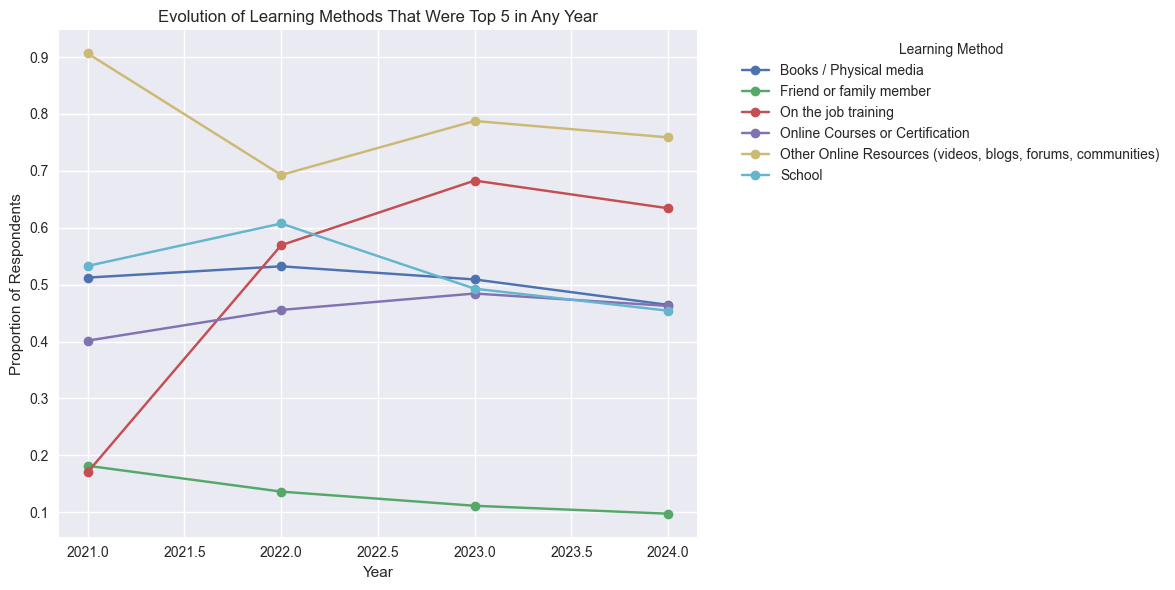

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result_recent' is a DataFrame with 'Year' and 'LearnCode' columns

# Step 1: Drop rows where 'LearnCode' is NaN
result_recent = result_recent.dropna(subset=['LearnCode'])

# Step 2: Ensure 'LearnCode' is of string type (optional, for consistency)
result_recent['LearnCode'] = result_recent['LearnCode'].astype(str)

# Step 3: Split 'LearnCode' by both commas and semicolons, strip whitespace, and remove empty entries
result_recent['LearnCode'] = result_recent['LearnCode'].str.split(';')

# Step 4: Explode the DataFrame to have one row per learning method per respondent
exploded = result_recent.explode('LearnCode')

# New Step: Harmonize similar data entries
harmonization_mapping = {
    "Other online resources (e.g., videos, blogs, forum)": "Other Online Resources (videos, blogs, forums, communities)",
    "Other online resources (ex: videos, blogs, etc., online community)": "Other Online Resources (videos, blogs, forums, communities)",
    "School (i.e., University, College, etc)" : "School",
    "Online Forum": "Other Online Resources (videos, blogs, forums, communities)",
    "Other online resources (e.g., videos, blogs, forum, online community)": "Other Online Resources (videos, blogs, forums, communities)",
    "Other online resources (ex: videos, blogs, etc)": "Other Online Resources (videos, blogs, forums, communities)",
    "Colleague": "On the job training"
}

# Apply the mapping to the 'LearnCode' column
exploded['LearnCode'] = exploded['LearnCode'].replace(harmonization_mapping)

# Step 5: Compute the total number of respondents per year
respondents_per_year = result_recent.groupby('Year').size().reset_index(name='total_respondents')

# Step 6: Count occurrences of each learning method per year
method_counts = exploded.groupby(['Year', 'LearnCode']).size().reset_index(name='count')

# Step 7: Merge with total respondents per year
method_counts = method_counts.merge(respondents_per_year, on='Year')

# Step 8: Calculate the proportion of respondents using each method
method_counts['proportion'] = method_counts['count'] / method_counts['total_respondents']

# Step 9: Identify the top 5 learning methods for each year
top_methods_per_year = method_counts.groupby('Year').apply(
    lambda x: x.nlargest(5, 'proportion')
).reset_index(drop=True)

# Step 10: Get the unique set of methods that were in the top 5 for any year
unique_top_methods = top_methods_per_year['LearnCode'].unique()

# Step 11: Filter the data to include only these unique top methods
filtered_data = method_counts[method_counts['LearnCode'].isin(unique_top_methods)]

# Step 12: Pivot the data for plotting, filling missing values with 0
pivot_data = filtered_data.pivot(index='Year', columns='LearnCode', values='proportion').fillna(0)

# Step 13: Create a line chart
pivot_data.index = pivot_data.index.astype(int)  # Convert the index to integer type
pivot_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolution of Learning Methods That Were Top 5 in Any Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Learning Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
print(exploded['LearnCode'].unique())

['Coding Bootcamp'
 'Other Online Resources (videos, blogs, forums, communities)' 'School'
 'Unknown' 'Friend or family member' 'Online Courses or Certification'
 'Other (please specify):' 'On the job training' 'Books / Physical media'
 'Hackathons (virtual or in-person)']


### Question2: How does developer compensation (CompTotal) vary by primary programming language?


#### How does developer compensation (CompTotal) vary by primary programming language through the year?
- reformulate the question properly
- line chart with Top 5 language in 2024
- timeline 2017-2024
- X = year, Y=CompTotal, color line = language

- Context: Businesses need to understand salary trends across programming languages to budget for hiring and retention, while developers can use this to negotiate salaries based on their skills.
- Approach: Analyze the CompTotal column (assumed to be annual compensation) against the Language column, focusing on the top languages.



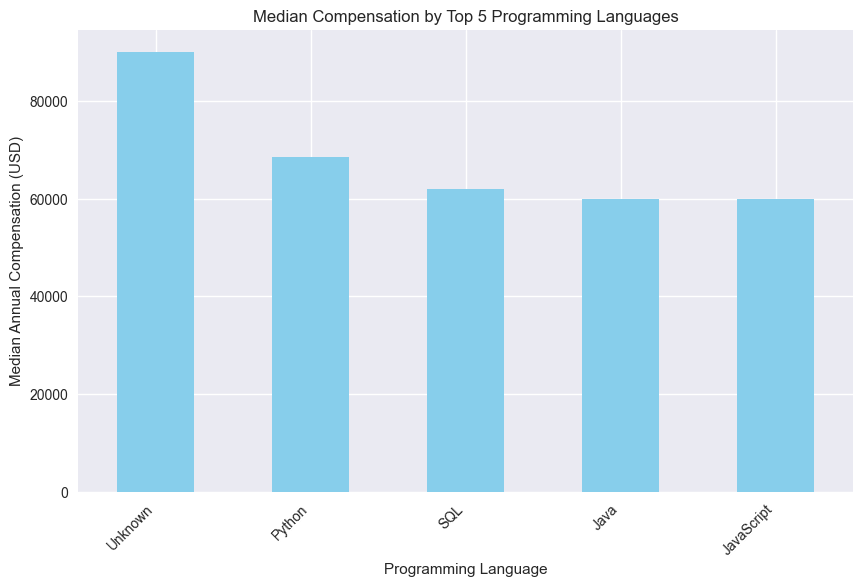


Median Compensation by Language:
LanguageWorkedWith
Unknown       90000.0
Python        68500.0
SQL           62000.0
Java          60000.0
JavaScript    60000.0
Name: CompTotal, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load data (assumed)
# df = pd.read_csv('stackoverflow_survey_data.csv')

# Clean compensation and language columns
result['CompTotal'] = pd.to_numeric(result['CompTotal'], errors='coerce')  # Convert to numeric, handle errors
result['LanguageWorkedWith'] = clean_categorical_column(result, 'LanguageWorkedWith')

# Handle multi-select languages by exploding
language_expanded = result[['CompTotal', 'LanguageWorkedWith']].copy()
language_expanded['LanguageWorkedWith'] = language_expanded['LanguageWorkedWith'].str.split(';')
language_expanded = language_expanded.explode('LanguageWorkedWith')

# Filter out invalid compensation and get top 5 languages by frequency
language_counts = language_expanded['LanguageWorkedWith'].value_counts()
top_5_languages = language_counts.head(5).index
filtered_df = language_expanded[language_expanded['LanguageWorkedWith'].isin(top_5_languages)].dropna(subset=['CompTotal'])

# Calculate median compensation by language
median_comp = filtered_df.groupby('LanguageWorkedWith')['CompTotal'].median().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
median_comp.plot(kind='bar', color='skyblue')
plt.title('Median Compensation by Top 5 Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Median Annual Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display table
print("\nMedian Compensation by Language:")
print(median_comp)

#### AI Q1: How has the adoption of AI tools for specific tasks (AITool) changed from 2023 to 2024 across different age groups (Age)?- Context: Businesses can use age-based trends in AI tool usage to design user experiences or training that resonate with different generational preferences, such as younger developers adopting AI for innovative tasks versus older developers using it for efficiency.
- 
Approach: Compare the frequency of specific AI tool tasks (e.g., "Code generation", "Debugging") across age groups between 2023 and 2024.
- 
Visualization: Facet grid of bar charts to display the usage of each AI task across age groups, with separate panels for 2023 and 2024.- Insight: If younger developers (e.g., "18-24") increasingly use AI for "Code generation" in 2024, while older developers (e.g., "45-54") favor "Debugging", businesses could tailor AI tool features or tutorials to these age-specific preferences




- timeline: 2023-2024

In [15]:
# Filter and prepare data
df_ai_tasks = df[df['year'].isin([2023, 2024])]
df_ai_tasks['AITool'] = df_ai_tasks['AITool'].fillna('None').str.split(';').explode()
df_ai_tasks['Age'] = df_ai_tasks['Age'].fillna('Unknown')

# Calculate task usage by year and age
task_usage = df_ai_tasks.groupby(['year', 'Age', 'AITool']).size().reset_index(name='count')

# Plot facet grid
g = sns.FacetGrid(task_usage, col='year', height=5, aspect=1.5)
g.map(sns.barplot, 'Age', 'count', 'AITool', dodge=True)
g.add_legend(title='AI Task')
g.set_titles('AI Tool Usage by Age - {col_name}')
g.set_axis_labels('Age Group', 'Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'year'

#### AI Q2: How does the willingness to pay for AI tools (AIAcc) vary by country (Country) between 2023 and 2024?- Context: AI tool providers need to understand regional differences in willingness to pay for AI tools to optimize pricing strategies or identify high-value markets.
  - 
Approach: Compare the distribution of AIAcc responses (e.g., "Willing to pay", "Not willing") across countries for 2023 and 2024, focusing on the tp  10 countries by response count
.- 
Visualization: Heatmap to show the proportion of developers willing to pay for AI tools by country and year, highlighting regional shift.    
- Insight: If willingness to pay increases in countries like "India" or "Germany" in 2024, AI tool providers might target these regions with premium offerings or localized pricing models to capitalize on growing demand.





- timeline: 2023-20
24

Insight: Languages like Python or Rust might show higher median compensation, indicating demand and specialization. Businesses can use this to adjust salary offers, while developers can prioritize learning high-value languages.



Insight: A low p-value (<0.05) indicates a significant relationship. Higher education levels (e.g., Master’s) might correlate with AI adoption, guiding recruitment or training priorities.

In [ ]:
# Filter and prepare data
df_ai_acc = df[df['year'].isin([2023, 2024])]
df_ai_acc['Country'] = df_ai_acc['Country'].fillna('Unknown')
df_ai_acc['AIAcc'] = df_ai_acc['AIAcc'].fillna('Unknown')

# Get top 10 countries by response count
top_countries = df_ai_acc['Country'].value_counts().head(10).index
df_top_countries = df_ai_acc[df_ai_acc['Country'].isin(top_countries)]

# Calculate proportion willing to pay by year and country
ai_acc_props = df_top_countries.groupby(['year', 'Country'])['AIAcc'].apply(lambda x: (x == 'Willing to pay').mean()).unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(ai_acc_props, cmap='Blues', annot=True, fmt='.2f')
plt.title('Willingness to Pay for AI Tools by Country (2023 vs 2024)')
plt.xlabel('Country')
plt.ylabel('Year')
plt.tight_layout()
plt.show()